## <font color='darkblue'>Preface</font>
([article source](https://machinelearningmastery.com/principal-component-analysis-for-visualization/)) <font size='3ptx'><b><a href='https://en.wikipedia.org/wiki/Principal_component_analysis'>Principal component analysis</a> (PCA) is an unsupervised machine learning technique. Perhaps the most popular use of principal component analysis is dimensionality reduction. </b></font>

Besides using PCA as a data preparation technique, we can also use it to help visualize data. A picture is worth a thousand words. With the data visualized, it is easier for us to get some insights and decide on the next step in our machine learning models.

In this tutorial, you will discover how to visualize data using PCA, as well as using visualization to help determining the parameter for dimensionality reduction. After completing this tutorial, you will know:

* How to use visualize a high dimensional data
* What is explained variance in PCA
* Visually observe the explained variance from the result of PCA of high dimensional data

<a id='sect0'></a>
### <font color='darkgreen'>Tutorial Overview</font>
This tutorial is divided into two parts; they are:

* <font size='3ptx'><a href='#sect1'>Scatter plot of high dimensional data</a></font>
* <font size='3ptx'><a href='#sect2'>Visualizing the explained variance</a></font>

### <font color='darkgreen'>Prerequisites</font>
For this tutorial, we assume that you are already familiar with:

* [How to Calculate Principal Component Analysis (PCA) from Scratch in Python](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)
* [Principal Component Analysis for Dimensionality Reduction in Python](https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/)

In [35]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_digits, load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.svm import SVC

plt.rcParams['figure.figsize'] = [8, 5]

<a id='sect1'></a>
## <font color='darkblue'>Scatter plot of high dimensional data</font>
<font size='3ptx'><b>Visualization is a crucial step to get insights from data. We can learn from the visualization that whether a pattern can be observed and hence estimate which machine learning model is suitable.</b></font>

<b>It is easy to depict things in two dimension. Normally a scatter plot with x- and y-axis are in two dimensional</b>. Depicting things in three dimensional is a bit challenging but not impossible. In matplotlib, for example, can plot in 3D. The only problem is on paper or on screen, we can only look at a 3D plot at one viewport or projection at a time. In matplotlib, this is controlled by the degree of elevation and azimuth. Depicting things in four or five dimensions is impossible because we live in a three-dimensional world and have no idea of how things in such a high dimension would look like.

This is where a dimensionality reduction technique such as PCA comes into play. <b>We can reduce the dimension to two or three so we can visualize it</b>. Let’s start with an example. <b>We start with the [wine dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset), which is a classification dataset with 13 features</b> (<font color='brown'>i.e., the dataset is 13 dimensional</font>) <b>and 3 classes. There are 178 samples</b>:

In [2]:
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


Among the 13 features, we can pick any two and plot with matplotlib (<font color='brown'>we color-coded the different classes using the</font> <font color='violet'>c</font> <font color='brown'>argument</font>):

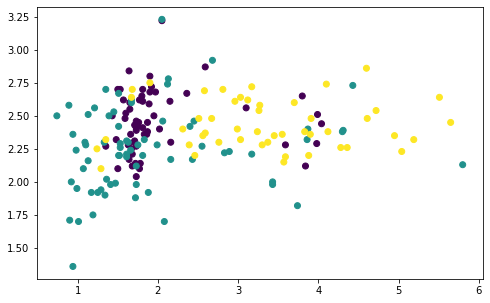

In [8]:
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

or we can also pick any three and show in 3D:

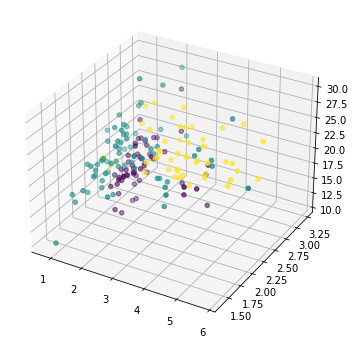

In [12]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
plt.show()

<b>But this doesn’t reveal much of how the data looks like, because majority of the features are not shown</b>. We now resort to principal component analysis by leveraging sklearn <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html'>PCA</a></b>:

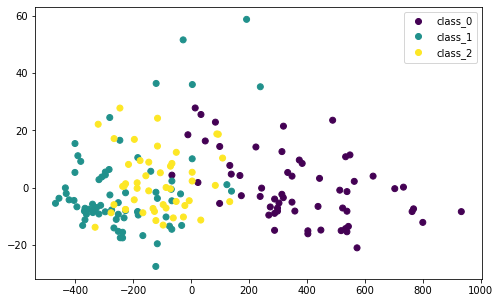

In [15]:
pca = PCA(n_components=2)
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

Here we transform the input data `X` by PCA into `Xt`. <b>We consider only the first two columns, which contain the most information, and plot it in two dimensional</b>. We can see that the purple class is quite distinctive, but there is still some overlap. <b>If we scale the data before PCA, the result would be different</b>:

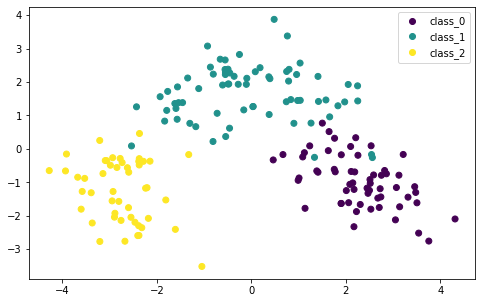

In [18]:
pca = PCA(n_components=2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

<b><font color='green'>Because PCA is sensitive to the scale</font>, if we normalized each feature by [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) we can see a better result</b>. Here the different classes are more distinctive. By looking at this plot, we are confident that a simple model such as SVM can classify this dataset in high accuracy.

If we apply the same method on a different dataset, such as MINST handwritten digits, the scatterplot is not showing distinctive boundary and therefore it needs a more complicated model such as neural network to classify:

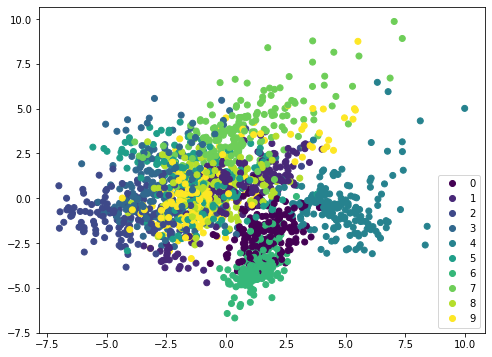

In [22]:
digitsdata = load_digits()
X, y = digitsdata['data'], digitsdata['target']
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(digitsdata['target_names']))
plt.show()

<a id='sect2'></a>
## <font color='darkblue'>Visualizing the explained variance</font> ([back](#sect0))
<font size='3ptx'><b>PCA in essence is to rearrange the features by their linear combinations. Hence it is called a feature extraction technique.</b></font> One characteristic of PCA is that the first principal component holds the most information about the dataset. The second principal component is more informative than the third, and so on.

To illustrate this idea, we can remove the principal components from the original dataset in steps and see how the dataset looks like. Let’s consider a dataset with fewer features, and show two features in a plot:

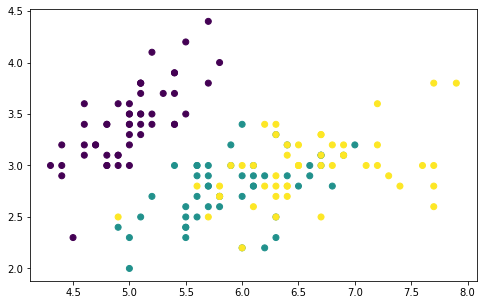

In [26]:
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

This is the [**iris dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) which has only four features. The features are in comparable scales and hence we can skip the scaler. With a 4-features data, the PCA can produce at most 4 principal components:

In [27]:
pca = PCA().fit(X)
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


For example, the first row is the first principal axis on which the first principal component is created. For any data point `p` with features $p=(a, b, c, d)$ , since the principal axis is denoted by the vector $v=(0.36, -0.08, 0.86, 0.36)$, the first principal component of this data point has the value $0.36*a - 0.08*b + 0.86*c + 0.36*d$ on the principal axis. Using vector dot product, this value can be denoted by
> $p.v$
<br/>

Therefore, with the dataset `X` as a 150 x 4 matrix (<font color='brown'>150 data points, each has 4 features</font>), we can map each data point into to the value on this principal axis by matrix-vector multiplication:
> $X.v$
<br/>

and the result is a vector of length 150. Now if we remove from each data point the corresponding value along the principal axis vector, that would be:
> $X - (X.v).v^T$
<br/>

If we plot the first two feature of $X - (X.v).v^T$, it looks like this:

In [29]:
X.mean(axis=0).shape

(4,)

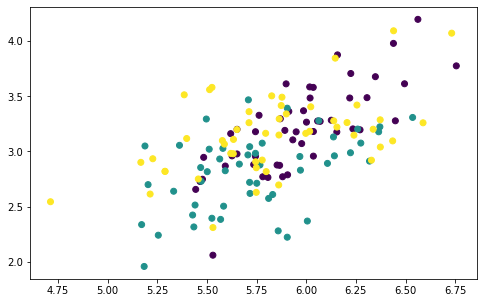

In [30]:
# Remove PC1
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[0]
pc1 = value.reshape(-1, 1) @ pca.components_[0].reshape(1, -1)
Xremove = X - pc1
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

The numpy array `Xmean` is to shift the features of `X` to centered at zero. This is required for PCA. Then the array value is computed by matrix-vector multiplication.

The array value is the magnitude of each data point mapped on the principal axis. So if we multiply this value to the principal axis vector we get back an array `pc1`. Removing this from the original dataset `X`, we get a new array `Xremove`. <b>In the plot we observed that the points on the scatter plot crumbled together and the cluster of each class is less distinctive than before. This means we removed a lot of information by removing the first principal component.</b> If we repeat the same process again, the points are further crumbled:

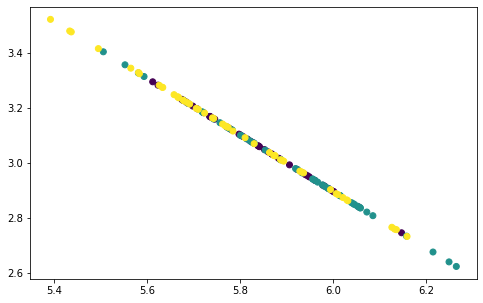

In [31]:
# Remove PC2
value = Xmean @ pca.components_[1]
pc2 = value.reshape(-1,1) @ pca.components_[1].reshape(1,-1)
Xremove = Xremove - pc2
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

This looks like a straight line but actually not. If we repeat once more, all points collapse into a straight line:

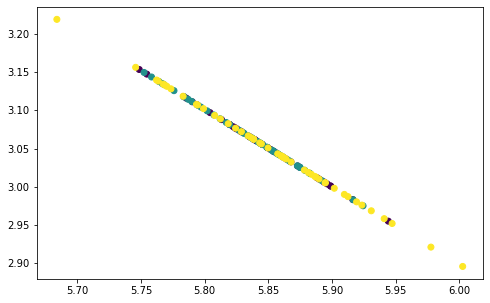

In [32]:
# Remove PC3
value = Xmean @ pca.components_[2]
pc3 = value.reshape(-1,1) @ pca.components_[2].reshape(1,-1)
Xremove = Xremove - pc3
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

The points all fall on a straight line because we removed three principal components from the data where there are only four features. Hence our data matrix becomes <b>rank 1</b>. You can try repeat once more this process and the result would be all points collapse into a single point.

<b>The amount of information removed in each step as we removed the principal components can be found by the corresponding explained variance ratio from the PCA</b>:

In [33]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


<b>Here we can see, the first component explained 92.5% variance and the second component explained 5.3% variance</b>. If we removed the first two principal components, the remaining variance is only 2.2%, hence visually the plot after removing two components looks like a straight line. In fact, when we check with the plots above, not only we see the points are crumbled, but the range in the x- and y-axes are also smaller as we removed the components.

In terms of machine learning, we can consider using only one single feature for classification in this dataset, namely the first principal component. We should expect to achieve no less than 90% of the original accuracy as using the full set of features:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))

Using all features, accuracy:  1.0
Using all features, F1:  1.0


In [43]:
mean = X_train.mean(axis=0)
X_train2 = X_train - mean
X_train2 = (X_train2 @ pca.components_[0]).reshape(-1,1)
clf = SVC(kernel="linear", gamma='auto').fit(X_train2, y_train)
X_test2 = X_test - mean
X_test2 = (X_test2 @ pca.components_[0]).reshape(-1,1)
print("Using PC1, accuracy: ", clf.score(X_test2, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(X_test2), average="macro"))

Using PC1, accuracy:  0.96
Using PC1, F1:  0.9606481481481483


In [41]:
pca = PCA(n_components=1).fit(X)

X_train3 = pca.transform(X_train)
X_test3 = pca.transform(X_test)
clf = SVC(kernel="linear", gamma='auto').fit(X_train3, y_train)
print("Using PC1(n_components=1), accuracy: ", clf.score(X_test3, y_test))
print("Using PC1(n_components=1), F1: ", f1_score(y_test, clf.predict(X_test3), average="macro"))

Using PC1(n_components=1), accuracy:  0.96
Using PC1(n_components=1), F1:  0.9586466165413533


<b>The other use of the explained variance is on compression</b>. Given the explained variance of the first principal component is large, if we need to store the dataset, we can store only the the projected values on the first principal axis ($X.v$), as well as the vector `v` of the principal axis. Then we can approximately reproduce the original dataset by multiplying them:
> $X =~ (X.v).v^T$
<br/>

In this way, we need storage for only one value per data point instead of four values for four features. The approximation is more accurate if we store the projected values on multiple principal axes and add up multiple principal components.

## <font color='darkblue'>Summary</font> ([back](#sect0))
In this tutorial, you discovered how to visualize data using principal component analysis. Specifically, you learned:

* Visualize a high dimensional dataset in 2D using PCA
* How to use the plot in PCA dimensions to help choosing an appropriate machine learning model
* How to observe the explained variance ratio of PCA
* What the explained variance ratio means for machine learning